In [45]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_manager.fontManager.addfont('fonts/Helvetica.ttc')
font_manager.fontManager.addfont('fonts/HelveticaNeue.ttc')
font_manager.fontManager.addfont('fonts/Arial.ttf')
plt.rcParams['text.color'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['xtick.color'] = '#333333'
plt.rcParams['ytick.color'] = '#333333'


plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [
    # 'Helvetica',
    'Arial',
    'DejaVu Sans',
    'HelveticaNeue',
    'Helvetica Neue',
]
font_path = font_manager.findfont(font_manager.FontProperties(family=['sans-serif']))
print(f"Actual font file being used: {font_path}")


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Actual font file being used: /scratch/cluster/sangjun/work/meta-cognition/notebooks/fonts/Arial.ttf


In [46]:
from meta.metric import type2_d_prime, meta_alignment

file_pattern = "../eval_outputs/patch2/triviaqa_qwen1.5-ml3-iter750_top_{patch_rate}_validation_None.tsv"
patch_rates = range(0, 101, 10)

In [47]:
import pandas as pd

patching_ratio = []
alignment = []
type2d = []

for rate in patch_rates:
    fname = file_pattern.format(patch_rate=rate)
    try:
        df = pd.read_csv(fname, sep="\t")
        direct_correctness = df['direct_correctness'].astype(int).tolist()
        yes = df['yes'].astype(int).tolist()
        alignment_list = meta_alignment(direct_correctness, yes)
        alignment_score = 100 * (sum(alignment_list) / len(alignment_list)) if len(alignment_list) > 0 else 0
        type2d_score = type2_d_prime(direct_correctness, yes)

        patching_ratio.append(rate)
        alignment.append(alignment_score)
        type2d.append(type2d_score)
    except Exception as e:
        print(f"Failed on {fname}: {e}")


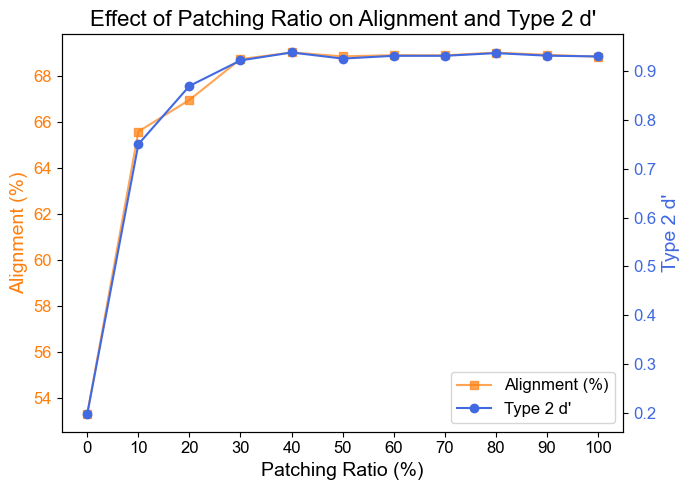

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7,5))

# Bar plot for alignment percentage
color_bar = 'tab:orange'
ax1.plot(patching_ratio, alignment, alpha=0.7, color=color_bar, marker='s', label="Alignment (%)")
ax1.set_xlabel('Patching Ratio (%)', fontsize=14)
ax1.set_ylabel('Alignment (%)', color=color_bar, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_bar, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.set_xticks(patching_ratio)
# Set y-axis bottom to first alignment value
ax1.set_ylim()

# Create a second y-axis for type 2 d'
ax2 = ax1.twinx()
color_line = 'royalblue'
ax2.plot(patching_ratio, type2d, color=color_line, marker='o', label="Type 2 d'")
ax2.set_ylabel("Type 2 d'", color=color_line, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_line, labelsize=12)

# Add legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=12)

plt.title("Effect of Patching Ratio on Alignment and Type 2 d'", fontsize=16)
plt.tight_layout()
plt.savefig("figures/weight-change-effect.pdf", dpi=300)
plt.show()


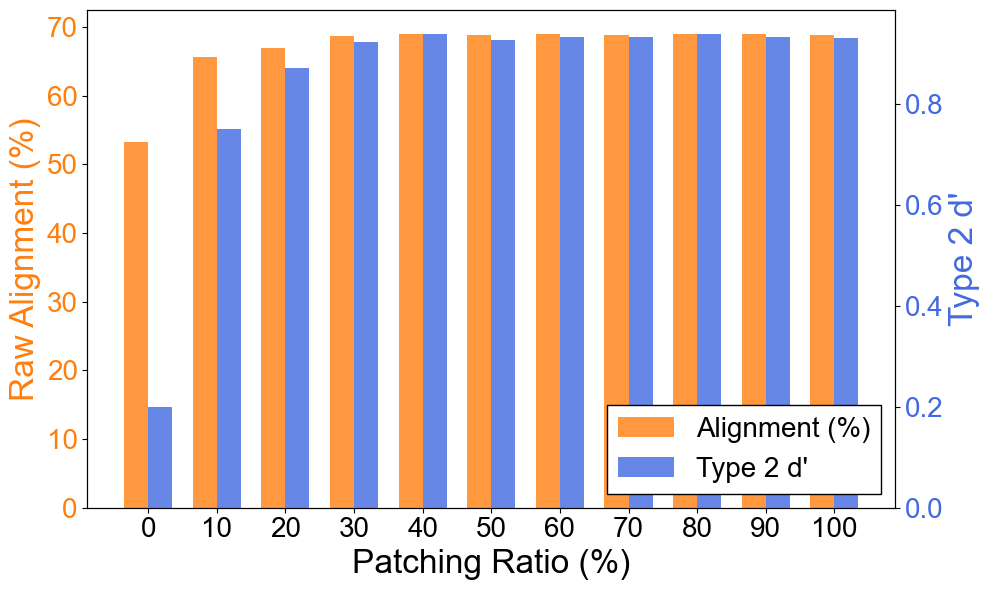

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(10, 6))

# Set up bar positions
x = np.arange(len(patching_ratio))
width = 0.35  # Width of the bars

# Create bars for alignment (left y-axis)
color_alignment = 'tab:orange'
color_type2d = 'royalblue'

bars1 = ax1.bar(x - width/2, alignment, width, label="Alignment (%)", color=color_alignment, alpha=0.8)
ax1.set_xlabel('Patching Ratio (%)', fontsize=24)
ax1.set_ylabel('Raw Alignment (%)', color=color_alignment, fontsize=24)
ax1.set_xticks(x)
ax1.set_xticklabels(patching_ratio, fontsize=20)
ax1.tick_params(axis='y', labelcolor=color_alignment, labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

# Create a second y-axis for type 2 d'
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, type2d, width, label="Type 2 d'", color=color_type2d, alpha=0.8)
ax2.set_ylabel("Type 2 d'", color=color_type2d, fontsize=24)
ax2.tick_params(axis='y', labelcolor=color_type2d, labelsize=20)

# Add legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
legend = ax2.legend(h1+h2, l1+l2, loc='lower right', fontsize=20,
                    fancybox=False, frameon=True, shadow=False,
                    facecolor='white', edgecolor='black', framealpha=1.0)
legend.set_zorder(10)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)

# plt.title("Effect of Patching Ratio from Top", fontsize=24)
plt.tight_layout()
plt.savefig("figures/weight-change-effect.pdf", dpi=300)
plt.show()


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


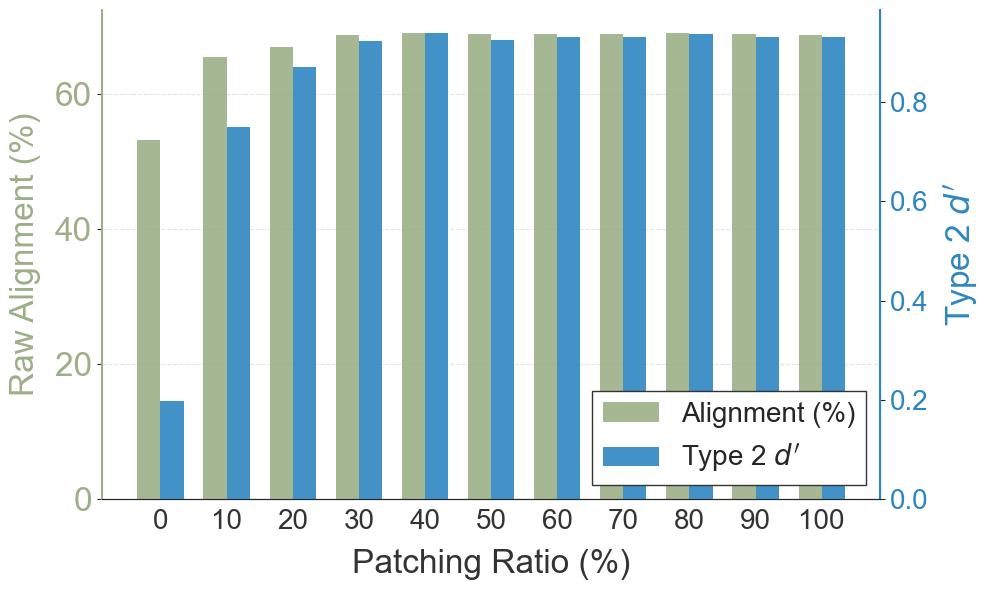

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2. Style Configuration
# Use seaborn style defaults for better font rendering and grid
sns.set_style("white")
plt.rcParams.update({'font.family': 'sans-serif'})

fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(patching_ratio))
width = 0.35

# 3. Define Elegant Colors (Hex codes)
# A deep slate blue for Alignment
c_align = '#9CAF88'
# A muted terracotta/coral for d'
c_dprime = '#2E86C1'

# --- Axis 1: Alignment (Bars) ---
bars1 = ax1.bar(x - width/2, alignment, width,
                label="Alignment (%)", color=c_align,
                edgecolor='white', linewidth=0, alpha=0.9, zorder=3)

ax1.set_xlabel('Patching Ratio (%)', fontsize=24, labelpad=10, color='#333333')
ax1.set_ylabel('Raw Alignment (%)', color=c_align, fontsize=24, labelpad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(patching_ratio, fontsize=20, color='#333333')
ax1.tick_params(axis='y', labelcolor=c_align, labelsize=24)
ax1.tick_params(axis='x', labelsize=20)

# Set Y-limits with some padding for aesthetics
# ax1.set_ylim(0, max(alignment) * 1.25)

# --- Axis 2: Type 2 d' (Bars) ---
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, type2d, width,
                label="Type 2 $d'$", color=c_dprime,
                edgecolor='white', linewidth=0, alpha=0.9, zorder=3)

ax2.set_ylabel("Type 2 $d'$", color=c_dprime, fontsize=24, labelpad=10)
ax2.tick_params(axis='y', labelcolor=c_dprime, labelsize=20)
# ax2.set_ylim(0, max(type2d) * 1.16)

# --- Aesthetic Polishing ---
# Add a grid behind the bars (zorder < 3)
ax1.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Remove top spines for a cleaner look
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Make the visible spines match the data colors
ax1.spines['left'].set_color(c_align)
ax1.spines['left'].set_linewidth(1.5)
ax2.spines['right'].set_color(c_dprime)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['left'].set_visible(False)

# --- Legend ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Create a clean floating legend
# legend = ax2.legend(h1+h2, l1+l2, loc='lower right', fontsize=20, frameon=False)
legend = ax2.legend(h1+h2, l1+l2, loc='lower right', fontsize=20,
                    fancybox=False, frameon=True, shadow=False,
                    facecolor='white', edgecolor='black', framealpha=1.0)
legend.set_zorder(10)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_edgecolor('#333333')
legend.get_frame().set_linewidth(1.0)


plt.tight_layout()
plt.savefig("figures/weight-change-effect.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [34]:
file_pattern = "../eval_outputs/patch2/triviaqa_qwen1.5-ml3-iter750_btm_{patch_rate}_validation_None.tsv"
patch_rates = range(0, 101, 10)

In [35]:
import pandas as pd

patching_ratio_btm = []
alignment_btm = []
type2d_btm = []

for rate in patch_rates:
    fname = file_pattern.format(patch_rate=rate)
    try:
        df = pd.read_csv(fname, sep="\t")
        direct_correctness = df['direct_correctness'].astype(int).tolist()
        yes = df['yes'].astype(int).tolist()
        alignment_list = meta_alignment(direct_correctness, yes)
        alignment_score = 100 * (sum(alignment_list) / len(alignment_list)) if len(alignment_list) > 0 else 0
        type2d_score = type2_d_prime(direct_correctness, yes)

        patching_ratio_btm.append(rate)
        alignment_btm.append(alignment_score)
        type2d_btm.append(type2d_score)
    except Exception as e:
        print(f"Failed on {fname}: {e}")


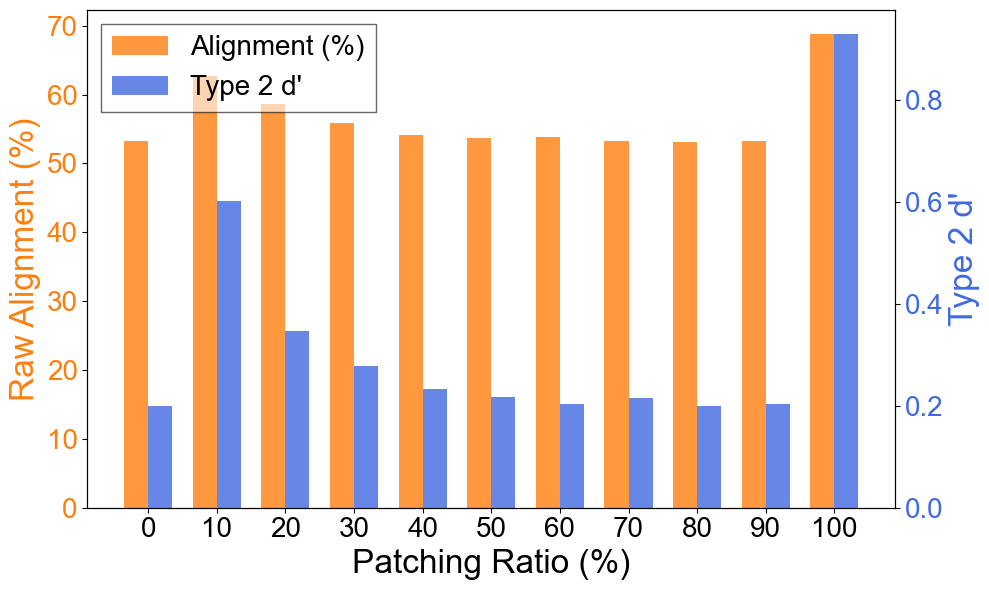

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(10, 6))

# Set up bar positions
x = np.arange(len(patching_ratio_btm))
width = 0.35  # Width of the bars

# Create bars for alignment (left y-axis)
color_alignment = 'tab:orange'
color_type2d = 'royalblue'

bars1 = ax1.bar(x - width/2, alignment_btm, width, label="Alignment (%)", color=color_alignment, alpha=0.8)
ax1.set_xlabel('Patching Ratio (%)', fontsize=24)
ax1.set_ylabel('Raw Alignment (%)', color=color_alignment, fontsize=24)
ax1.set_xticks(x)
ax1.set_xticklabels(patching_ratio_btm, fontsize=20)
ax1.tick_params(axis='y', labelcolor=color_alignment, labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

# Create a second y-axis for type 2 d'
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, type2d_btm, width, label="Type 2 d'", color=color_type2d, alpha=0.8)
ax2.set_ylabel("Type 2 d'", color=color_type2d, fontsize=24)
ax2.tick_params(axis='y', labelcolor=color_type2d, labelsize=20)

# Add legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
legend = ax2.legend(h1+h2, l1+l2, loc='upper left', fontsize=20,
                    fancybox=False, frameon=True, shadow=False,
                    facecolor='white', edgecolor='black', framealpha=1.0)
legend.set_zorder(10)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.6)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)

# plt.title("Effect of Patching Ratio from Bottom", fontsize=24)
plt.tight_layout()
plt.savefig("figures/weight-change-effect-btm.pdf", dpi=300)
plt.show()


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


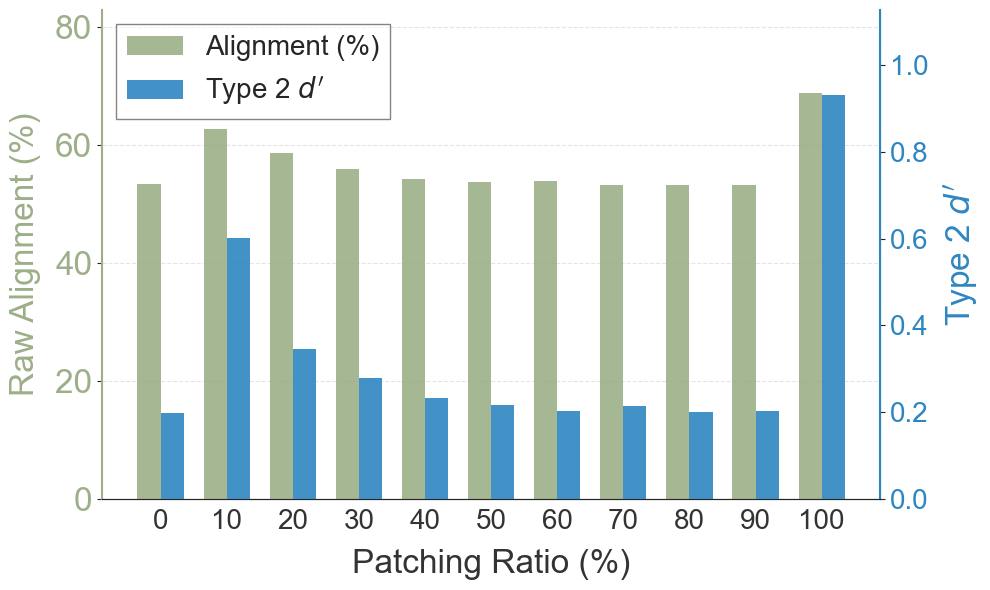

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2. Style Configuration
# Use seaborn style defaults for better font rendering and grid
sns.set_style("white")
plt.rcParams.update({'font.family': 'sans-serif'})

fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(patching_ratio_btm))
width = 0.35

# 3. Define Elegant Colors (Hex codes)
# A deep slate blue for Alignment
c_align = '#9CAF88'
# A muted terracotta/coral for d'
c_dprime = '#2E86C1'

# --- Axis 1: Alignment (Bars) ---
bars1 = ax1.bar(x - width/2, alignment_btm, width,
                label="Alignment (%)", color=c_align,
                edgecolor='white', linewidth=0, alpha=0.9, zorder=3)

ax1.set_xlabel('Patching Ratio (%)', fontsize=24, labelpad=10, color='#333333')
ax1.set_ylabel('Raw Alignment (%)', color=c_align, fontsize=24, labelpad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(patching_ratio_btm, fontsize=20, color='#333333')
ax1.tick_params(axis='y', labelcolor=c_align, labelsize=24)
ax1.tick_params(axis='x', labelsize=20)

# Set Y-limits with some padding for aesthetics
ax1.set_ylim(0, max(alignment) * 1.2)

# --- Axis 2: Type 2 d' (Bars) ---
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, type2d_btm, width,
                label="Type 2 $d'$", color=c_dprime,
                edgecolor='white', linewidth=0, alpha=0.9, zorder=3)

ax2.set_ylabel("Type 2 $d'$", color=c_dprime, fontsize=24, labelpad=10)
ax2.tick_params(axis='y', labelcolor=c_dprime, labelsize=20)
ax2.set_ylim(0, max(type2d) * 1.2)

# --- Aesthetic Polishing ---
# Add a grid behind the bars (zorder < 3)
ax1.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

# Remove top spines for a cleaner look
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Make the visible spines match the data colors
ax1.spines['left'].set_color(c_align)
ax1.spines['left'].set_linewidth(1.5)
ax2.spines['right'].set_color(c_dprime)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['left'].set_visible(False)

# --- Legend ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Create a clean floating legend
# legend = ax2.legend(h1+h2, l1+l2, loc='lower right', fontsize=20, frameon=False)
legend = ax2.legend(h1+h2, l1+l2, loc='upper left', fontsize=20,
                    fancybox=False, frameon=True, shadow=False,
                    facecolor='white', edgecolor='black', framealpha=1.0)
legend.set_zorder(10)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.6)
legend.get_frame().set_edgecolor('#333333')
legend.get_frame().set_linewidth(1.0)


plt.tight_layout()
plt.savefig("figures/weight-change-effect-btm.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()